In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
raw = pd.read_csv('file.csv')
raw['Date'] = pd.to_datetime(raw["DataCreationDate"], format = "%Y-%m-%d %H:%M")
raw = raw.set_index(['Date'])
raw.columns

/Users/chen_yenru/opt/anaconda3/envs/tflearn/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (6,7,8,9,10,14,15,18,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['SiteName', 'County', 'AQI', 'Pollutant', 'Status', 'SO2', 'CO', 'O3',
       'O3_8hr', 'PM10', 'PM2.5', 'NO2', 'NOx', 'NO', 'WindSpeed', 'WindDirec',
       'DataCreationDate', 'Unit', 'CO_8hr', 'PM2.5_AVG', 'PM10_AVG',
       'SO2_AVG', 'Longitude', 'Latitude', 'SiteId'],
      dtype='object')

In [38]:
"""Get Taichung's data"""
raw = raw[['SiteName', "DataCreationDate", "AQI", "County"]]

mask = (raw['County'] == "臺中市") & (raw['SiteName']!='崇倫') & (raw['SiteName']!= "行動監測03")
data = raw[mask]
data["AQI"] = data["AQI"].fillna(0)

<ipython-input-38-30573b60b93f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["AQI"] = data["AQI"].fillna(0)


In [39]:
"""Data Inspection"""
data.head()

,SiteName,DataCreationDate,AQI,County
Date,,,,
2016-11-25 13:00:00,豐原,2016-11-25 13:00,23.0,臺中市
2016-11-25 13:00:00,沙鹿,2016-11-25 13:00,21.0,臺中市
2016-11-25 13:00:00,大里,2016-11-25 13:00,25.0,臺中市
2016-11-25 13:00:00,忠明,2016-11-25 13:00,23.0,臺中市
2016-11-25 13:00:00,西屯,2016-11-25 13:00,24.0,臺中市


2021-12-31 23:00:00


<AxesSubplot:xlabel='DataCreationDate'>

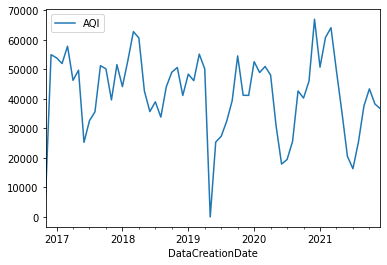

In [40]:
mask_shi = data['SiteName']=='西屯'
shitun = data[mask_shi]

td = shitun.set_index(pd.DatetimeIndex(pd.to_datetime(shitun["DataCreationDate"], format = "%Y-%m-%d %H:%M")))
print(shitun.index.max())
td.resample('M').sum().plot()

2021-12-31 23:00:00


KeyError: 'Column not found: data'

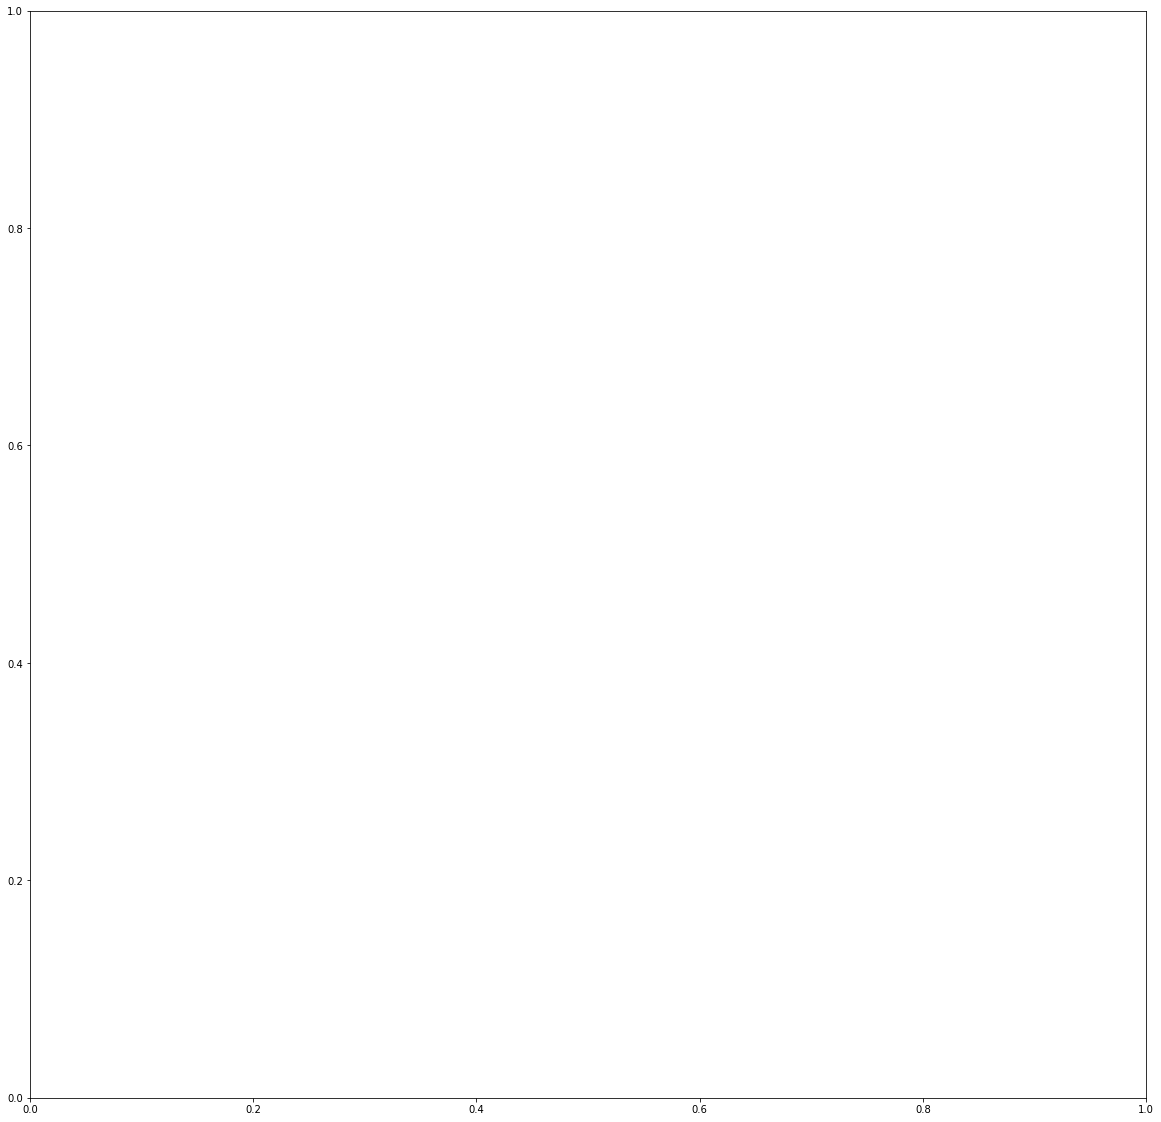

In [41]:
td = data.set_index(pd.DatetimeIndex(pd.to_datetime(data["DataCreationDate"], format = "%Y-%m-%d %H:%M")))
print(data.index.max())
#td.resample('M').sum().plot()
ax,fig = plt.subplots(figsize=(20, 20))
td['mon'] = td.groupby(td.index.month)['data'].transform('mean')
# td.groupby('SiteName')['AQI'].plot(legend=True)
# td.resample('M').sum().plot()